## Double pendulum using Lagrange's equation

Defines a DoublePendulum class that is used to generate basic double pendulum plots from solving Lagrange's equations. I have written this notebook by making changes to the pre-existing/given notebooks from Carmen (both for the code and the markdown cells). I have also used google on to learn how to code a few things such at denoting double derivative in markdown, arguments of  plt.subplot, etc. I have also used/referred code from the hints video for this final HW.

* Last revised 17-Mar-2019 by Dick Furnstahl (furnstahl.1@osu.edu).

## Euler-Lagrange equation

For a simple pendulum, the Lagrangian with generalized coordinate $\phi$ is

$\begin{align}
  \mathcal{L} = \frac12 (m_1 + m_2)  l_1^2 \dot\phi_1^2 + \frac12 m_2  l_2^2 \dot\phi_2^2 +\ m_2  l_1 l_2 \dot\phi_1  \dot\phi_1 \cos(\phi_1 - \phi_1) - (m_1 + m_2) g l_1(1 - \cos\phi_1)- m_2 g l_2(1 - \cos\phi_2)
\end{align}$

The Euler-Lagrange equation is
1. for $ \phi_1 $ , with $z_1=\dot\phi_1$ and $\dot z_1=\ddot\phi_1$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_1} = \frac{\partial\mathcal L}{\partial\phi_1}
 \quad\Longrightarrow\quad
\dot z_1 = \frac{m_2 \sin(\phi_1 - \phi_2) [l_1 z_1^2 \cos(\phi_1 - \phi_2) + l_2 z_2^2 ] - (m_1 + m_2) g \sin(\phi_1 - \phi_2) + m_2 g \sin\phi_2 \cos(\phi_1 - \phi_2) )}{l_1 (m_1 + m_2 \sin^2(\phi_1 - \phi_2))}
  \ 
  \;.
\end{align}$

2. for $ \phi_2 $ , with $z_2=\dot\phi_2$ and $\dot z_2=\ddot\phi_2$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_2} = \frac{\partial\mathcal L}{\partial\phi_2}
 \quad\Longrightarrow\quad
\dot z_2 = \frac{(m_1 + m_2)[l_1 z_1^2 \sin(\phi_1 - \phi_2)+ g\cos(\phi_1 - \phi_2)\sin\phi_1 -g\sin\phi_2]+ m_2 l_2 z_2^2 \cos(\phi_1 - \phi_2)\sin(\phi_1 - \phi_2)}{l_2 (m_1 + m_2 \sin^2(\phi_1 - \phi_2))}
  \ 
  \;.
\end{align}$



In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [3]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 12
plt.rcParams.update({'font.size': font_size})

## Pendulum class and utility functions

In [4]:
class DoublePendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple double pendulum (no driving or damping).
     
    Parameters
    ----------
    l1 : float
        length of the first pendulum
    l2: float 
        length of the second pendulum
    g : float
        gravitational acceleration at the earth's surface
    m1 : float
        mass of first pendulum
    m2: float
        mass of the second pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, l1=1., l2=1., m1=1., m2=1., g=1.
                ):
        self.l1 = l1
        self.l2= l2
        self.g = g
        self.m1 = m1
        self.m2=m2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with y[0] = phi1(t)  y[1] = dphi1/dt= phi1_dot = z1
                                      y[2] = phi2(t)  y[3] = dphi2/dt= phi2_dot = z2
    
            
        Returns
        -------
        
        """
        
        phi1, z1, phi2, z2 = y
        
        c,s= np.cos(phi1-phi2), np.sin(phi1-phi2)
        
        phi1_dot = z1
        
        z1_dot= (-self.m2 * s * (self.l1* (z1**2) * c + self.l2* (z2**2)) - (self.m1 + self.m2) * self.g * np.sin(phi1)\
                + self.m2 * self.g * np.sin(phi2) * c )/ (self.l1 * (self.m1 + self.m2 * (s**2)))
        
        phi2_dot = z2
        
        z2_dot= ((self.m1 + self.m2) * (self.l1* z1**2 * s + self.g * c * np.sin(phi1) - self.g * np.sin(phi2))\
                + self.m2* self.l2 * z2**2 * c * s )/ (self.l2 * (self.m1 + self.m2 * s**2))
        
        

        # I have taken/referred most of this from the code in the hints video as I was having some trouble
        # in keeping track of all the phi, phi_dots 
        
        return [phi1_dot, z1_dot, phi2_dot, z2_dot ]
     # not sure why we don't return phi1 and phi2 as well
    def solve_ode(self, t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0,
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi1_0, phi1_dot_0, phi2_0, phi2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi1, phi1_dot, phi2, phi2_dot = solution.y

        return phi1, phi1_dot, phi2, phi2_dot

In [5]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [6]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make simple pendulum plots 

In [7]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')

#phi2_vs_time_labels = (r'$t$', r'$\phi2(t)$')
#phi2_dot_vs_time_labels = (r'$t$', r'$d\phi2/dt(t)$')

state_space_labels_1 = (r'$\phi1$', r'$d\phi1/dt$')
state_space_labels_2 = (r'$\phi2$', r'$d\phi2/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

l1 = 1.
l2=1
g = 1.
m1 = 1.
m2=1

# Instantiate a pendulum 
p1 = DoublePendulum(l1=l1, l2=l2, g=g, m1=m1, m2=m2)


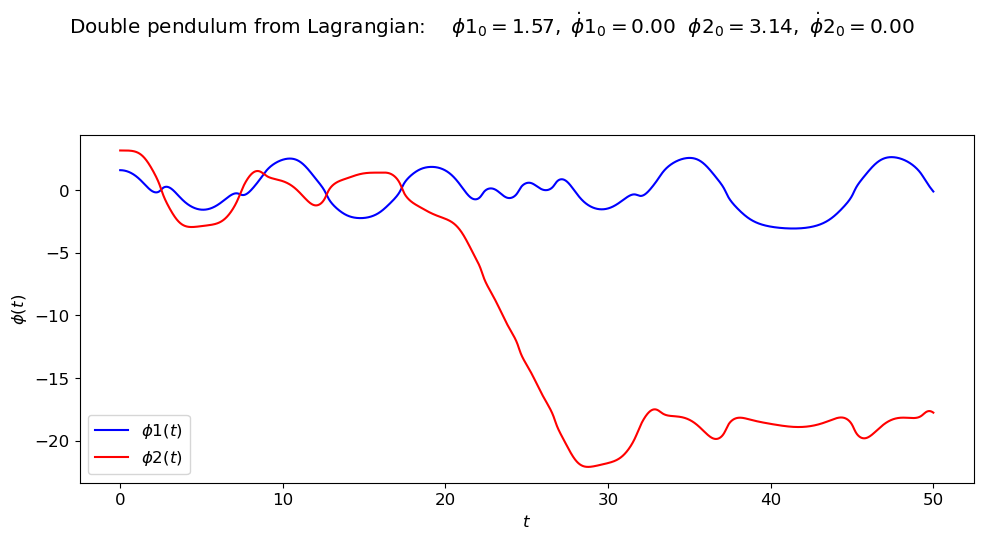

In [8]:
# both plots: same initial conditions
phi1_0 = np.pi/2
phi1_dot_0 = 0.
phi2_0 = np.pi
phi2_dot_0 = 0.
phi1, phi1_dot, phi2, phi2_dot = p1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)


# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf'  $\phi1_0 = {phi1_0:.2f},$' + \
                rf' $\dot\phi1_0 = {phi1_dot_0:.2f}$' + \
                 rf'  $\phi2_0 = {phi2_0:.2f},$' + \
                rf' $\dot\phi2_0 = {phi2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi1 plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=r'$\phi1(t)$', 
            #title=r'$\phi1(t)$', 
            ax=ax_a)
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=r'$\phi2(t)$', 
            #title=r'$\phi2(t)$', 
            ax=ax_a)    
                              


fig.tight_layout()
fig.savefig('Double_pendulum_final_phi .png', bbox_inches='tight')  

# Analyzing Chaos 

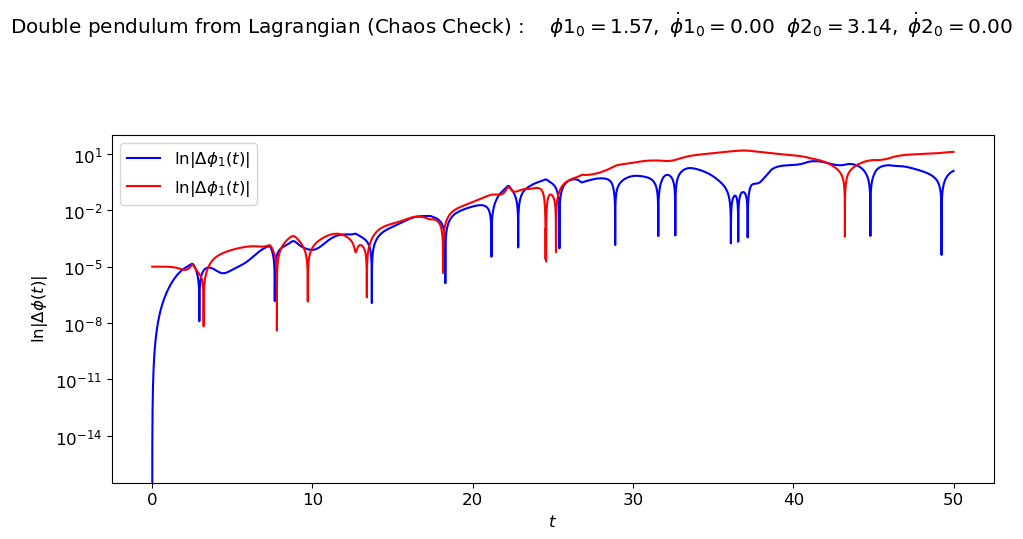

In [9]:
# both plots: same initial conditions
phi1_0 = np.pi/2
phi1_dot_0 = 0.
phi2_0 = np.pi
phi2_dot_0 = 0.


phi1, phi1_dot, phi2, phi2_dot = p1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)
phi1b, phi1b_dot, phi2b, phi2b_dot = p1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0+0.00001, phi2_dot_0)

phi_vs_time_labels = (r'$t$', r'$\ln|\Delta\phi(t)|$')
# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Double pendulum from Lagrangian (Chaos Check) :  ' + \
                rf'  $\phi1_0 = {phi1_0:.2f},$' + \
                rf' $\dot\phi1_0 = {phi1_dot_0:.2f}$' + \
                 rf'  $\phi2_0 = {phi2_0:.2f},$' + \
                rf' $\dot\phi2_0 = {phi2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi1 plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], np.abs(phi1[start : stop]- phi1b[start : stop] ), 
            axis_labels=phi_vs_time_labels, semilogy= True,
            color='blue',
            label=r'$\ln|\Delta\phi_1(t)|$', 
            #title=r'$\phi1(t)$', 
            ax=ax_a)
plot_y_vs_x(t_pts[start : stop], np.abs(phi2[start : stop]- phi2b[start : stop] ), 
            axis_labels=phi_vs_time_labels, semilogy= True,
            color='red',
            label=r'$\ln|\Delta\phi_1(t)|$', 
            #title=r'$\phi2(t)$', 
            ax=ax_a)    
                              


fig.tight_layout()
fig.savefig('Double_pendulum_final_1b_chaos .png', bbox_inches='tight')  

# Chaos 

In the plot above we can see that the maxima of the difference between the 2 angles i.e., $\ln|\Delta\phi_1|$ and $\ln|\Delta\phi_2|$ is increasing with time. Hence the slope is positive which means $\Delta\phi_1$ and $\Delta\phi_2$ is increasing exponentially with time which means that the system exhibits chaos. (Based on Chapter 12)

 # Plotting $\dot\phi_1$ and $\dot\phi_2$ as a function of time

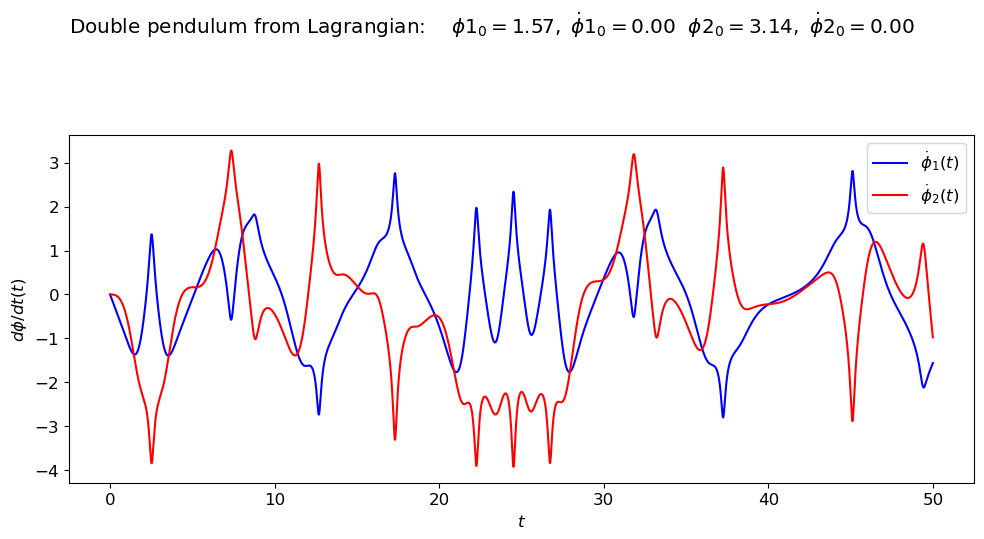

In [10]:
# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf'  $\phi1_0 = {phi1_0:.2f},$' + \
                rf' $\dot\phi1_0 = {phi1_dot_0:.2f}$' + \
                 rf'  $\phi2_0 = {phi2_0:.2f},$' + \
                rf' $\dot\phi2_0 = {phi2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    

# second plot: phi_dot plot 
ax_b = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1_dot[start : stop], 
            axis_labels=phi_dot_vs_time_labels, 
            color='blue',
            label='$\dot\phi_1(t)$', 
            #title=r'$\dot\phi1(t)$', 
            ax=ax_b)
plot_y_vs_x(t_pts[start : stop], phi2_dot[start : stop], 
            axis_labels=phi_dot_vs_time_labels, 
            color='red',
            label='$\dot\phi_2(t)$', 
            #title=r'$\dot\phi1(t)$', 
            ax=ax_b)    


fig.tight_layout()
fig.savefig('Double_pendulum_final_phi_dot .png', bbox_inches='tight')  




 # Plotting state space for m1 i.e., $\dot\phi_1$ vs $\phi_1$ 

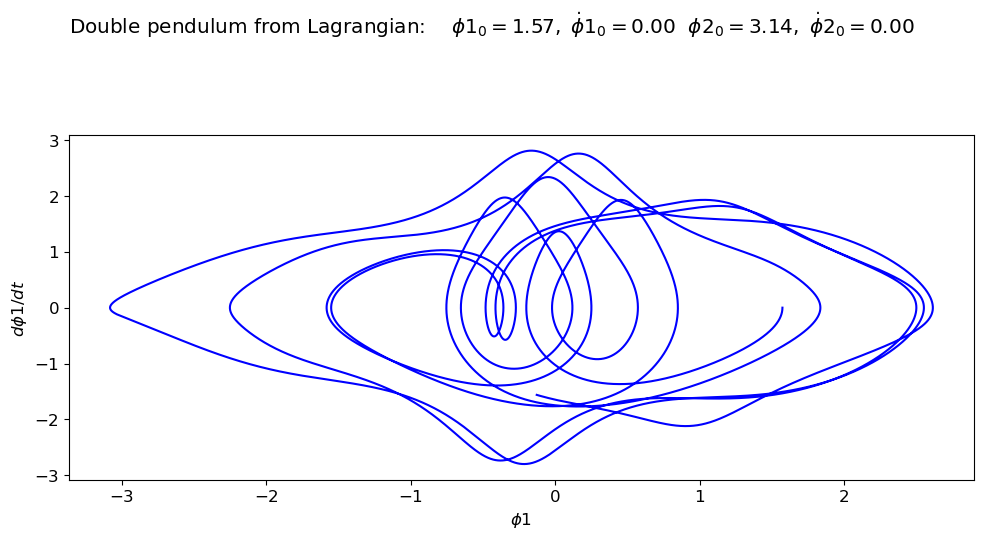

In [11]:
# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf'  $\phi1_0 = {phi1_0:.2f},$' + \
                rf' $\dot\phi1_0 = {phi1_dot_0:.2f}$' + \
                 rf'  $\phi2_0 = {phi2_0:.2f},$' + \
                rf' $\dot\phi2_0 = {phi2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    


# third plot: state space plot from t=30 to t=50   
ax_c = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi1[start : stop], phi1_dot[start : stop], 
            axis_labels=state_space_labels_1, 
            color='blue',
            label=None, 
            #title='State space 1', 
            ax=ax_c)    




fig.tight_layout()
fig.savefig('Double_pendulum_final_state_space_1 .png', bbox_inches='tight')  

 # Plotting state space for m2 i.e., $\dot\phi_2$ vs $\phi_2$ 

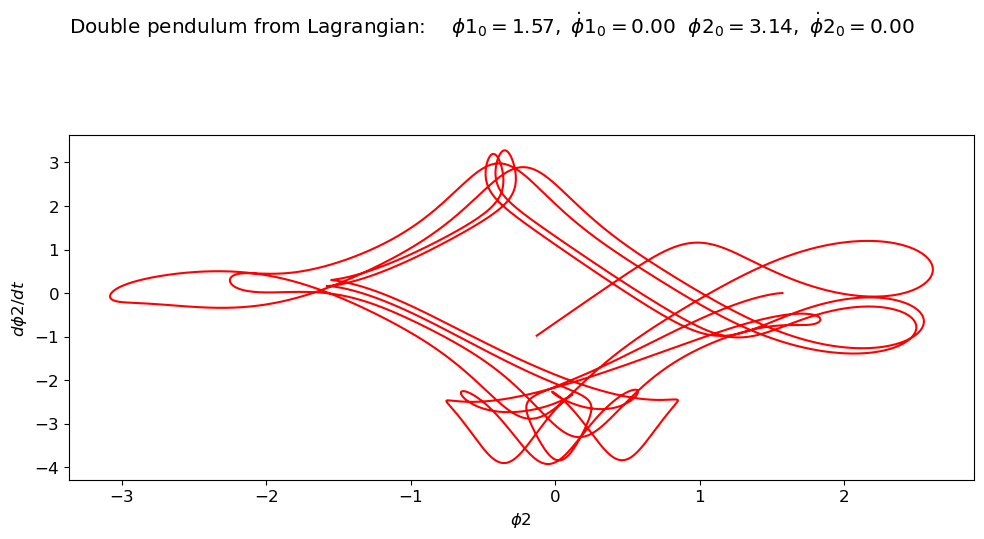

In [12]:
# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf'  $\phi1_0 = {phi1_0:.2f},$' + \
                rf' $\dot\phi1_0 = {phi1_dot_0:.2f}$' + \
                 rf'  $\phi2_0 = {phi2_0:.2f},$' + \
                rf' $\dot\phi2_0 = {phi2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
 
# third plot: state space plot from t=30 to t=50   
ax_c = fig.add_subplot(1,1,1)    


plot_y_vs_x(phi1[start : stop], phi2_dot[start : stop], 
            axis_labels=state_space_labels_2, 
            color='red',
            label=None, 
            #title='State space 2', 
            ax=ax_c)    


fig.tight_layout()
fig.savefig('Double_pendulum_final_state_space_2 .png', bbox_inches='tight')  

# Plotting power spectrum for $\phi_1$

Now trying the power spectrum, plotting only positive frequencies and cutting off the lower peaks:

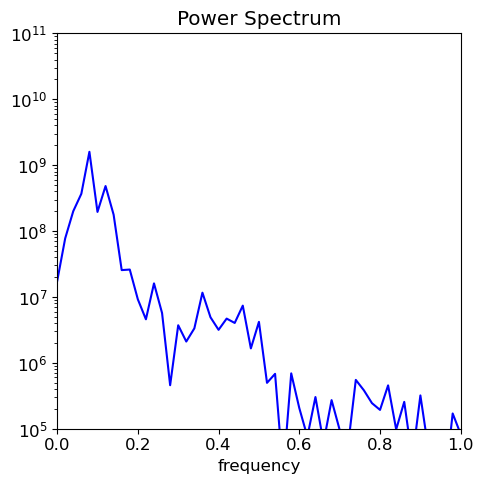

In [13]:
start, stop = start_stop_indices(t_pts, t_start, t_end)    
signal = phi1[start:stop]
power_spectrum = np.abs(np.fft.fft(signal))**2
freqs = np.fft.fftfreq(signal.size, delta_t)
idx = np.argsort(freqs)

fig_ps = plt.figure(figsize=(5,5))
ax_ps = fig_ps.add_subplot(1,1,1)
ax_ps.semilogy(freqs[idx], power_spectrum[idx], color='blue')
ax_ps.set_xlim(0, 1.)
ax_ps.set_ylim(1.e5, 1.e11)
ax_ps.set_xlabel('frequency')
ax_ps.set_title('Power Spectrum')

fig_ps.tight_layout()

# Plotting power spectrum for $\phi21$

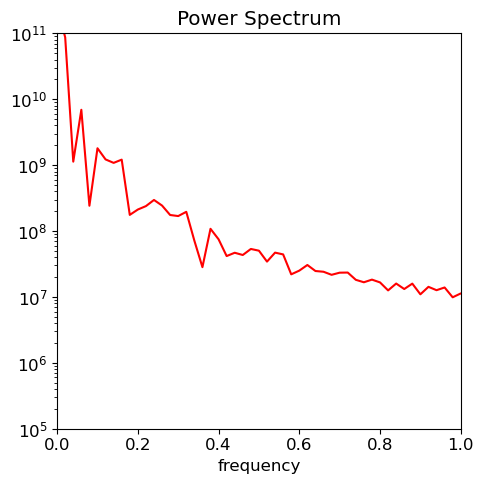

In [14]:
start, stop = start_stop_indices(t_pts, t_start, t_end)    
signal = phi2[start:stop]
power_spectrum = np.abs(np.fft.fft(signal))**2
freqs = np.fft.fftfreq(signal.size, delta_t)
idx = np.argsort(freqs)

fig_ps = plt.figure(figsize=(5,5))
ax_ps = fig_ps.add_subplot(1,1,1)
ax_ps.semilogy(freqs[idx], power_spectrum[idx], color='red')
ax_ps.set_xlim(0, 1.)
ax_ps.set_ylim(1.e5, 1.e11)
ax_ps.set_xlabel('frequency')
ax_ps.set_title('Power Spectrum')

fig_ps.tight_layout()

The assignment is based on code taken from the final hw hints video, theory, concepts, and formulae/ equations from the textbook, python notebooks from Carmen, ideas from classmates (Manali, Aiden), information obtained from google searches on python code, and discussion with class mates on discord. The following links were used- 

1. https://tex.stackexchange.com/questions/152951/how-to-write-two-dot-above-a-letter
2. https://www.google.com/search?q=how+to+write+x+double+dot+in+markdown&client=safari&rls=en&sxsrf=APwXEdfP4eYtPAV7qQE2m3LQVgFNYRSOeQ%3A1682560284113&ei=HNVJZOG7BobIptQP5uCJ0AY&ved=0ahUKEwjhubDA-cj-AhUGpIkEHWZwAmoQ4dUDCA8&uact=5&oq=how+to+write+x+double+dot+in+markdown&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzILCCEQoAEQwwQQiwM6CggAEEcQ1gQQsAM6BwgjELACECc6CgghEKABEMMEEAo6DQghEKABEMMEEAoQiwM6BwghEAoQiwNKBAhBGABQ5A9YyyJg5SVoA3AAeACAAXaIAasGkgEDMy41mAEAoAEByAEIuAEDwAEB&sclient=gws-wiz-serp
3. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
